<a href="https://colab.research.google.com/github/SangHee33/SangHee1/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_train_1%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1. 라이브러리 및 데이터**


In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and dir

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 불러오기
train=pd.read_csv('/content/movies_train.csv')

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


문제 1) 상영 등급에 따른 관객 수 평균 lineplot

<Axes: xlabel='screening_rat'>

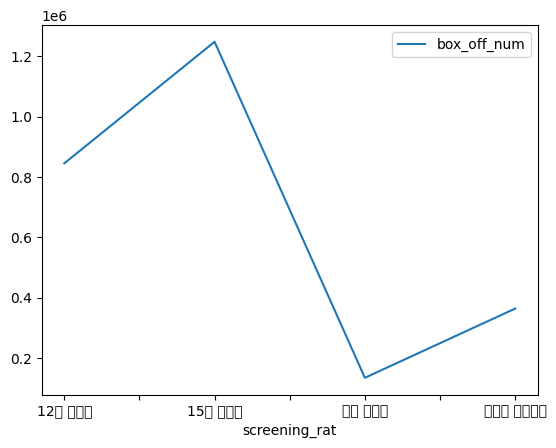

In [ ]:
a = train[['screening_rat','box_off_num']].groupby('screening_rat').mean()
a.plot()
plt.show()

**결과** 
>
상영 등급에 따라 관객 수의 평균에 차이가 있었는데, 15세 관람가 -> 12세 관람가 -> 청소년 관람 불가 -> 전체 관람가 순으로 갈수록 관객 수의 평균이 줄어들었다.

문제 2) 장르 별 관객 수 총 합이 10000000명 이하인 작품(bar)

In [ ]:
x=train[['box_off_num','genre']].groupby('genre').sum()
print(x)

y = x[x.box_off_num<10000000]
print(type(y))

        box_off_num
genre              
SF         23248494
공포         24814966
느와르        61119768
다큐멘터리       6247020
드라마       138277444
멜로/로맨스     33225507
뮤지컬           33135
미스터리        8968319
서스펜스         165222
애니메이션       3820460
액션         61711274
코미디        63277442
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='genre'>

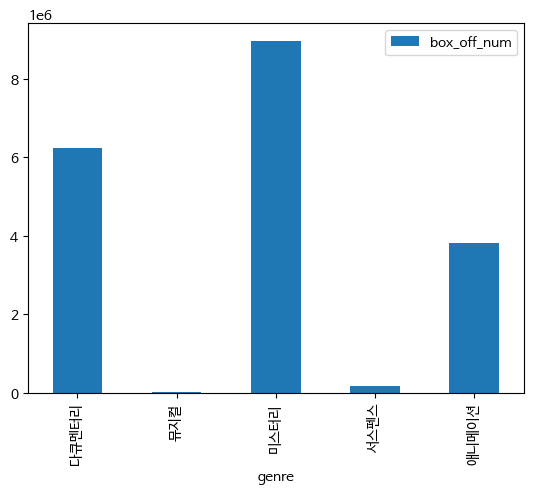

In [ ]:
y.plot(kind='bar')

**결과** 
>
장르 별 관객 수의 총 합을 구해서 그 중 100000000명 이하인 장르들을 구해보면, 다큐멘터리, 뮤지컬, 미스터리, 서스펜스, 애니메이션이 있음을 알 수 있다. 특히 그 중에서도 뮤지컬과 서스펜스의 관객 수 총 합이 눈에 띄게 적음을 알 수 있다.

문제 3) 상영 시간에 따른 관객수를 나타내는 regplot

---




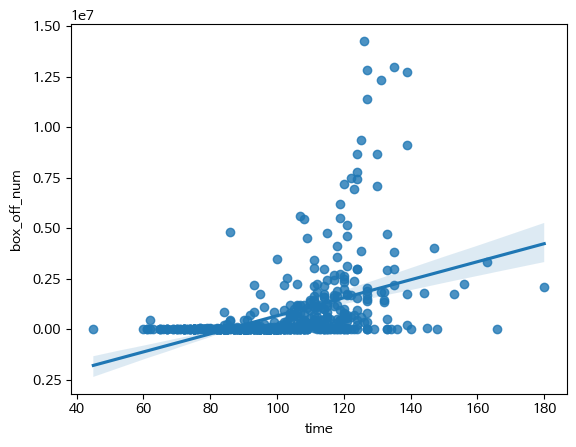

In [ ]:
# 회귀선과 산점도 그래프가 함께 나옴
time_num = sns.regplot(x='time',y='box_off_num',data=train)

**결과** 
>
상영 시간이 120분 이상, 140분 이하인 영화의 관객 수가 100분 이하인 영화보다 많은 편이라는 것을 알 수 있고 회귀선을 통해 상영 시간과 관객 수 간에 양의 상관관계가 있다는 것을 알 수 있다.

문제 4) 감독이 해당 년도의 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수 합과 해당 년도 영화의 관객수 합을 비교하는 bar 그래프

In [ ]:
# 개봉일에서 개봉년도 추출
a=[]
for i in range(600):
  y = train.iloc[i]['release_time'][0:4]
  a.append(y)

In [ ]:
# 개봉년도를 dataframe에 추가
train['year'] = a
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010


<Axes: xlabel='year'>

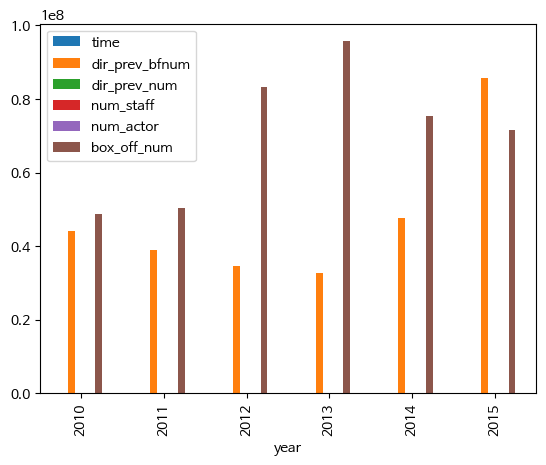

In [ ]:
ans = train.groupby('year').sum()
ans.plot(kind='bar')

**결과** 
>
감독이 해당 년도의 영화를 만들기 전에 제작에 참여했던 영화의 평균 관객수 합에 비해 2015년을 제외한 모든 년도의 해당 년도 영화의 관객수 합이 증가하였음을 알 수 있다.

In [ ]:
#train=pd.read_csv('/content/drive/MyDrive/movies_train.csv')
#test=pd.read_csv("/content/drive/MyDrive/movies_test.csv")
#submission=pd.read_csv("/content/drive/MyDrive/submission.csv")

In [ ]:
##데이터 처리
train.isna().sum()
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

In [ ]:
#그래프 폰트깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


문제 5) 연도별 청소년 관람 불가 영화와 아닌 영화의 관객수를 비교하는 violinplot

Text(0, 0.5, '관객 수')

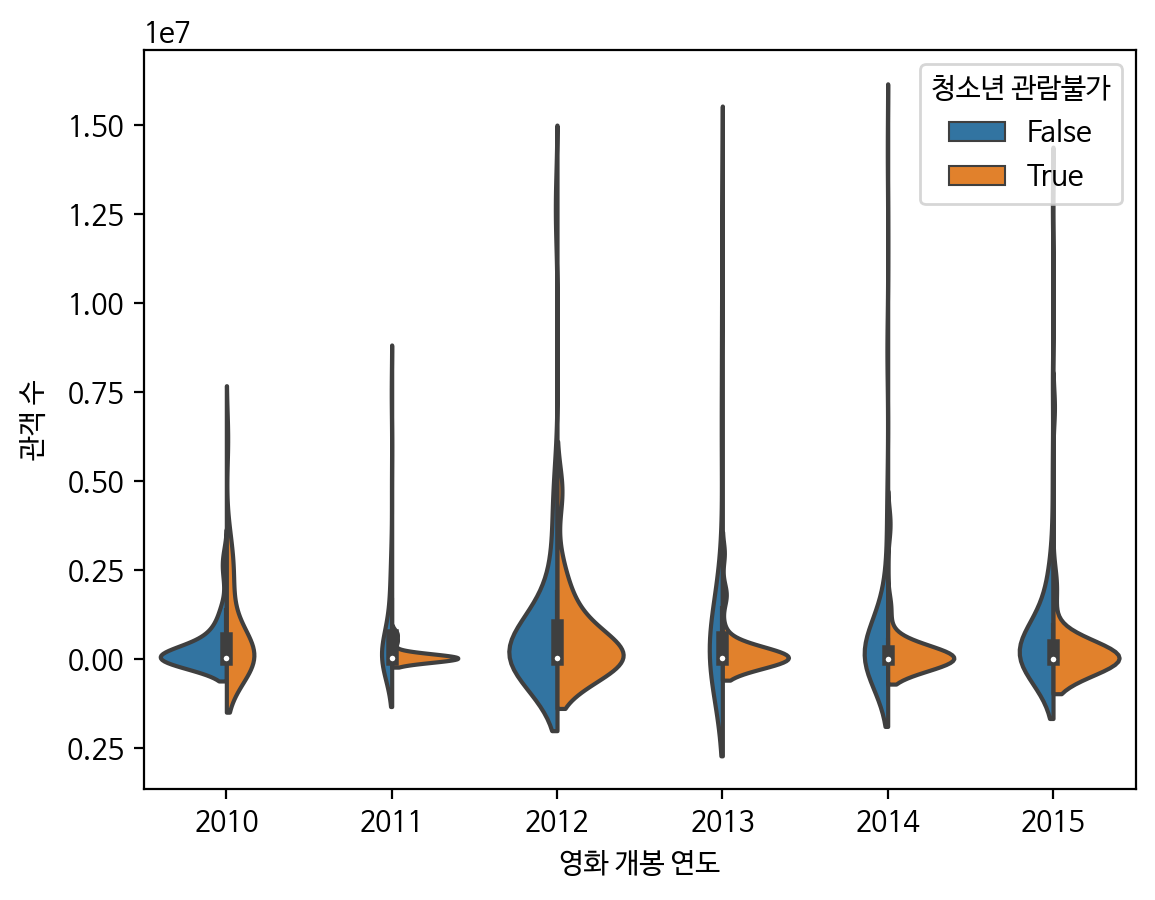

In [ ]:
import seaborn as sns
#영화가 청소년 관람불가일때 adult:False, 아니면 adult:True가 나오는 새로운 column 생성
train['청소년 관람불가']=train['screening_rat']=='청소년 관람불가'
#한글폰트깨짐 방지 위한 세팅
from matplotlib import font_manager, rc
#font_path = "C:/Windows/Fonts/NGULIM.TTF"
#font = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)
ax=plt.figure()
axes1=ax.add_subplot(1,1,1)
#boxplot에 데이터 분포에 따른 크기를 반영한 violin plot 그리기

axes1=sns.violinplot(x='release_year',y='box_off_num',hue='청소년 관람불가',data=train,split=True)
axes1.set_xlabel('영화 개봉 연도')
axes1.set_ylabel('관객 수')

**결과** 
>
2012년 전체적인 관객 수가 가장 많고 2010년 청소년 관람불가와 청소년 관람 불가가 아닌 영화의 관객수 차이가 가장 큰 것을 확인할 수 있다

문제 6) 매년 장르간 점유율을 비교하는 pie plot

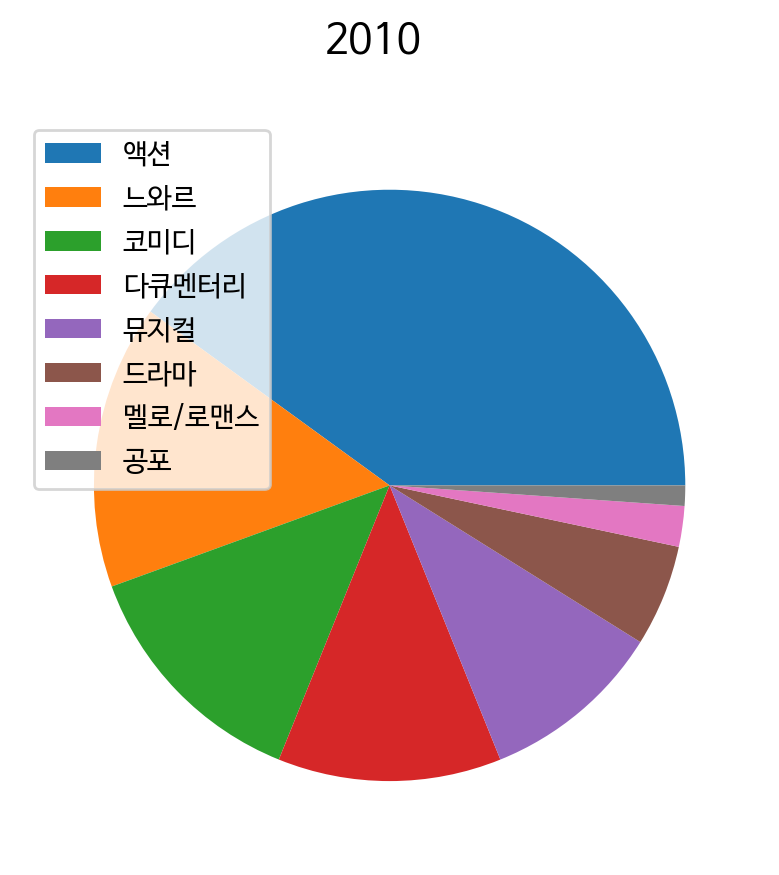

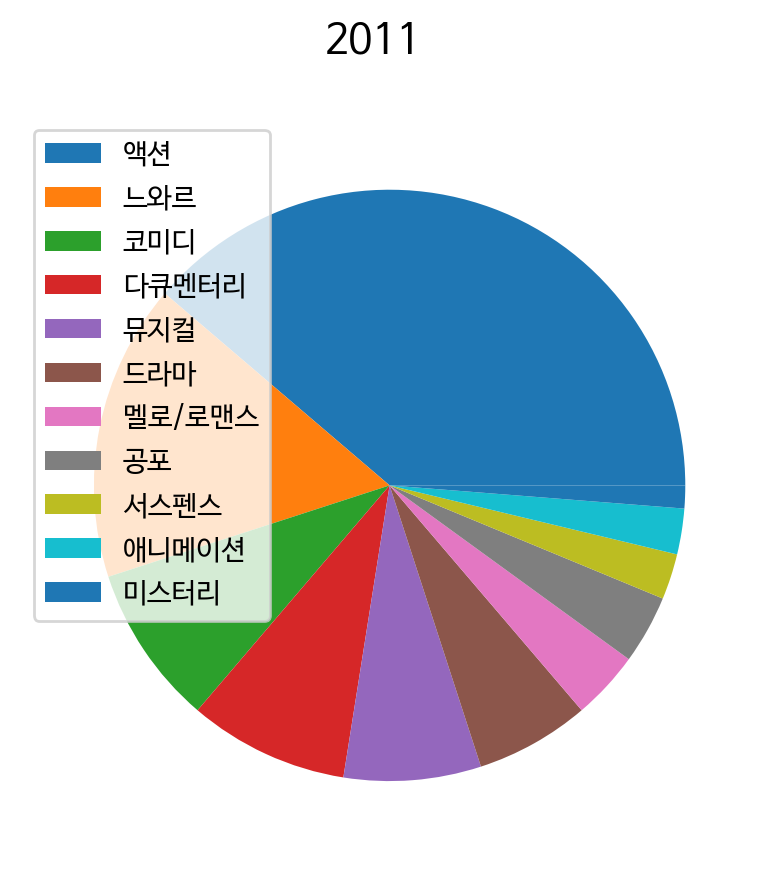

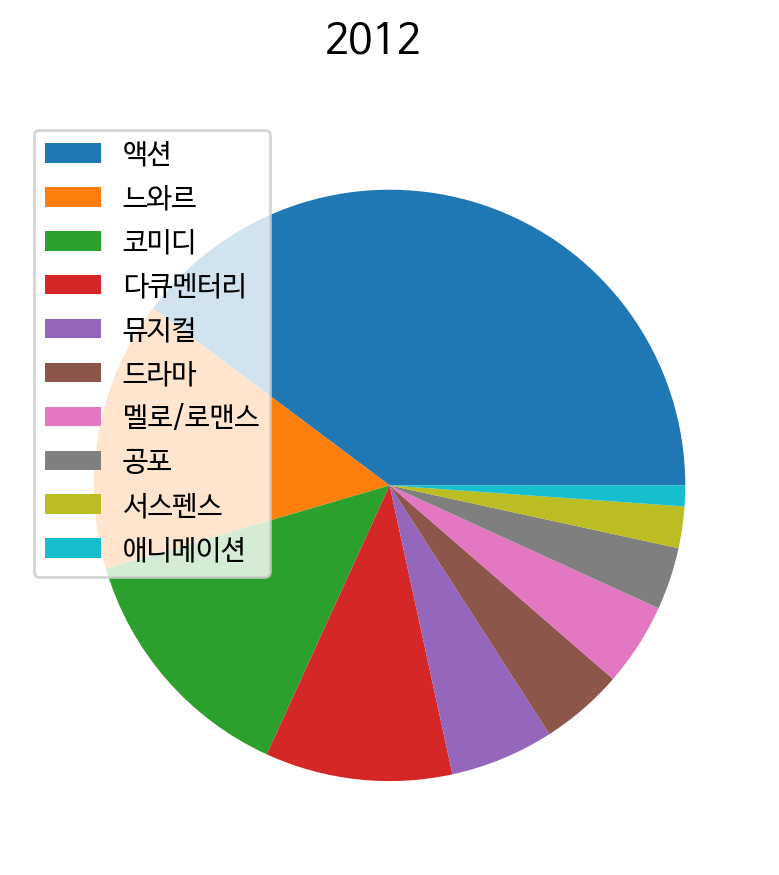

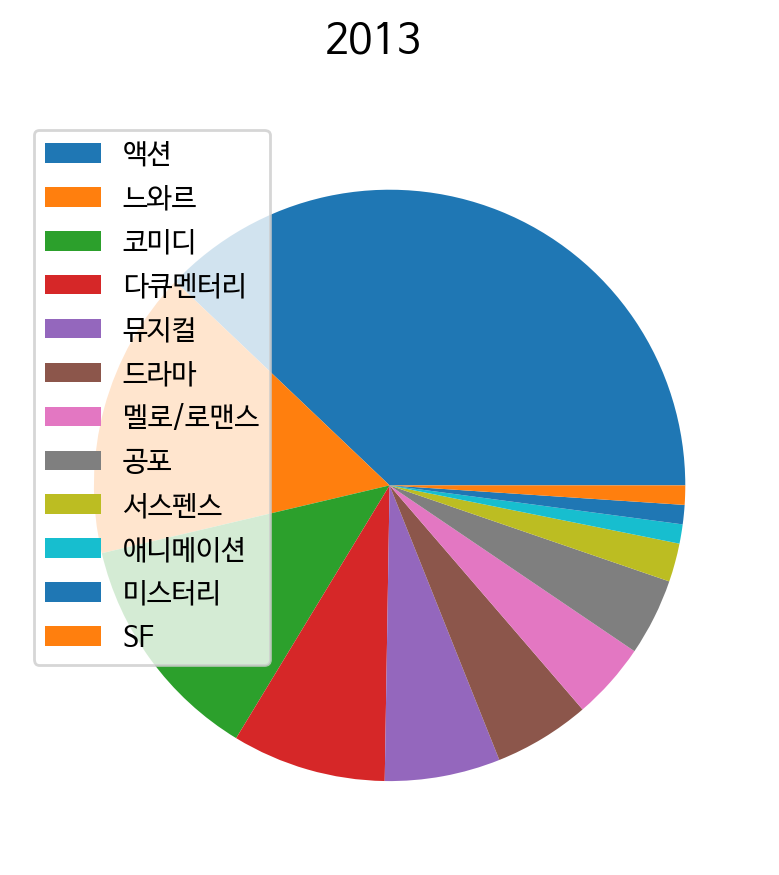

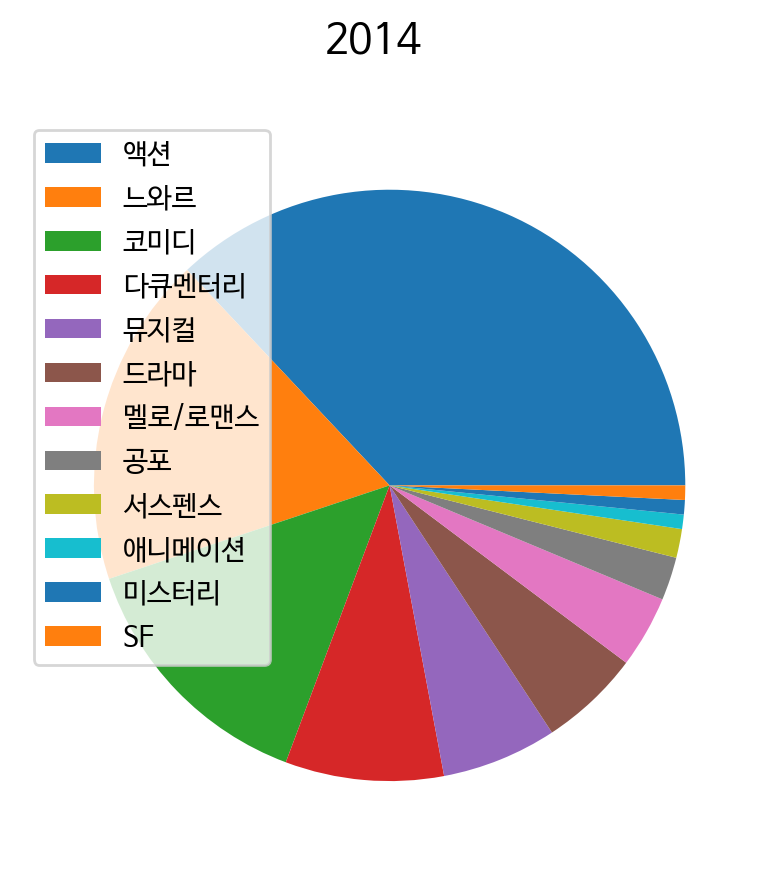

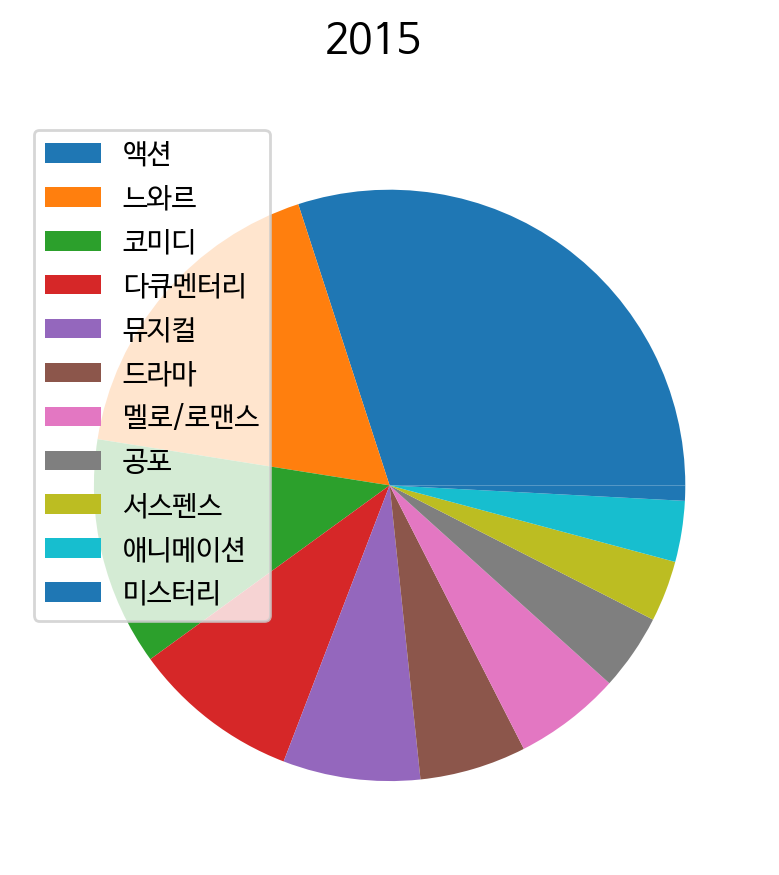

In [ ]:
# 매년 장르간 점유율 비교: pie plot 이용하기
# 연도와 장르 를 정리한 list 생성
llist=sorted(train['release_year'].unique().tolist())
ggenre=train['genre'].unique().tolist()
# for문을 이용하여 매년 장르간 점유율을 pie plot으로 각각 그리기
for i in llist:
    pies=train[train['release_year']==i]['genre'].value_counts()
    plt.pie(pies)
    plt.legend(ggenre)
    plt.suptitle(i,fontsize=15)
    plt.show()

**결과** 
> 
액션,느와르,코미디 영화는 연도를 불문하고 가장 인기가 있다는 것을 확인할 수 있다. 나머지 장르의 점유율 순위는 매년 약간의 차이가 난다는 것을 알 수 있다.  

문제 7) 영화 참여 총 인원수와 영화 상영시간의 관계를 연도별로 확인하는 joint plot

Text(0.5, 0.98, '영화 총 인원수와 영화 상영 시간의 JOINT PLOT')

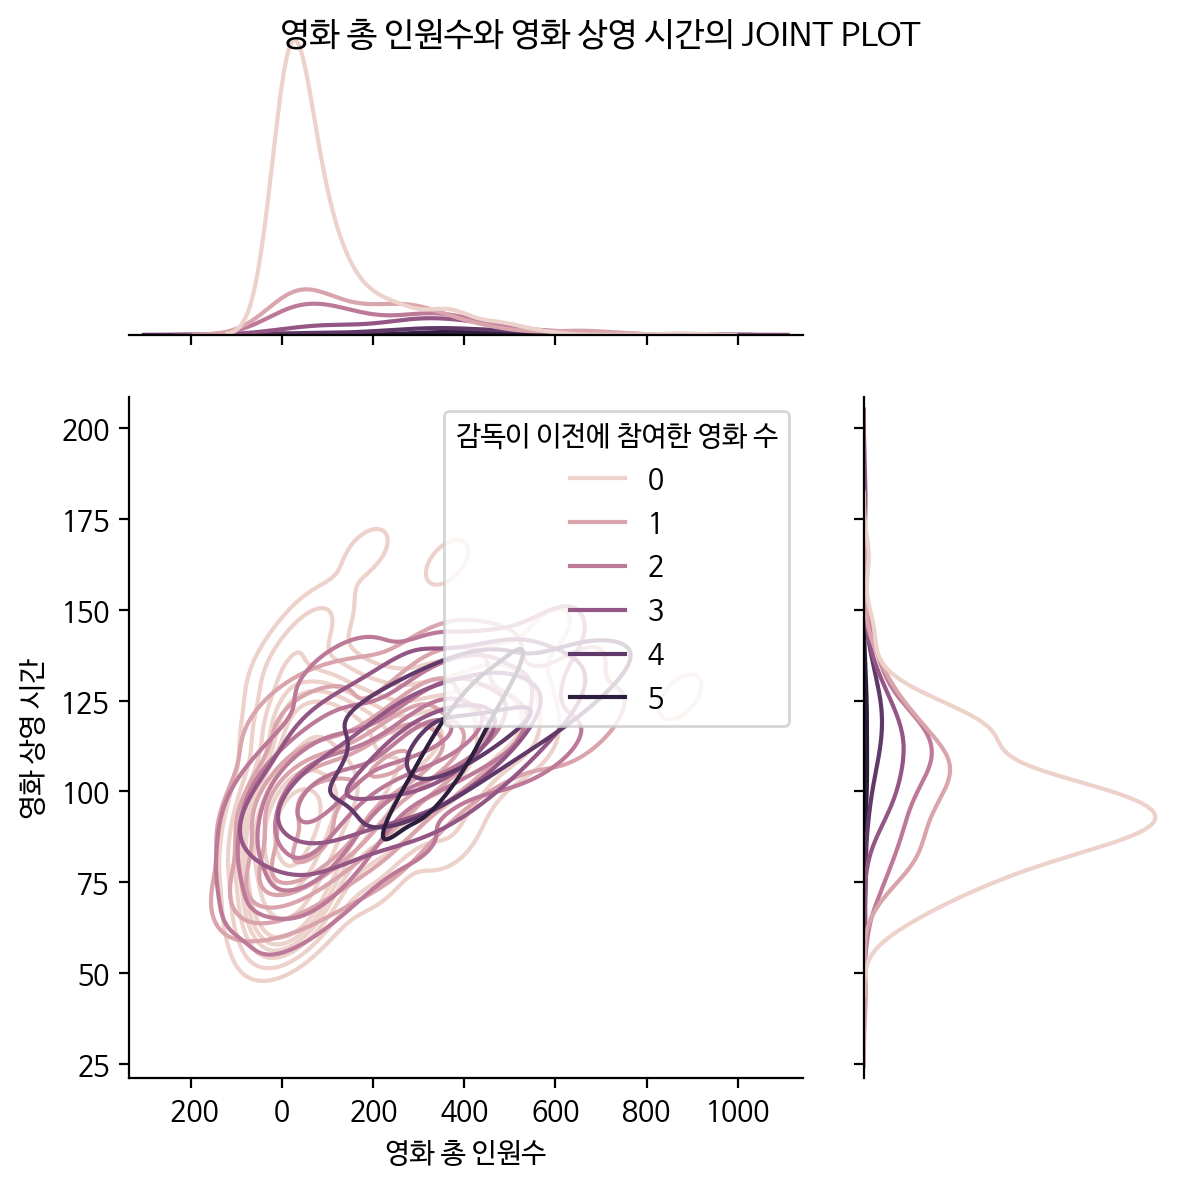

In [ ]:
#영화 참여 총 인원수: 스태프 수 + 배우 수+ 감독 수(1명)
train["num_total"]=train["num_staff"]+train["num_actor"]+1
train["감독이 이전에 참여한 영화 수"]=train["dir_prev_num"]
#영화 감독이 이전에 몇개의 작품에 참여했는지에 따라 영화의 scale이 달라질 수 있으므로 감독의 이전 작품수를 hue에 넣기
ax=sns.jointplot(data=train, x='num_total', y="time",kind='kde',ratio=2,color="pink",shadow=True,hue="감독이 이전에 참여한 영화 수")
ax.set_axis_labels(xlabel="영화 총 인원수",ylabel="영화 상영 시간")
ax.fig.suptitle("영화 총 인원수와 영화 상영 시간의 JOINT PLOT")

**결과** 
> 
전체적으류 영화 참여 총 인원수와 영화 상영 시간이 양의 관계를 가짐을 알 수 있다. 영화 감독이 이전에 참여한 영화 수가 많을 수록 영화의 총인원수와 상영시간이 평균의 값을 가짐을 알 수 있다. 

문제 8) 감독이 전에 제작에 참여한 영화의 개수 대비 평균 관객수의 barplot

In [ ]:
# 결측값 0으로 채우기
train['dir_prev_bfnum'].fillna(0, inplace=True)

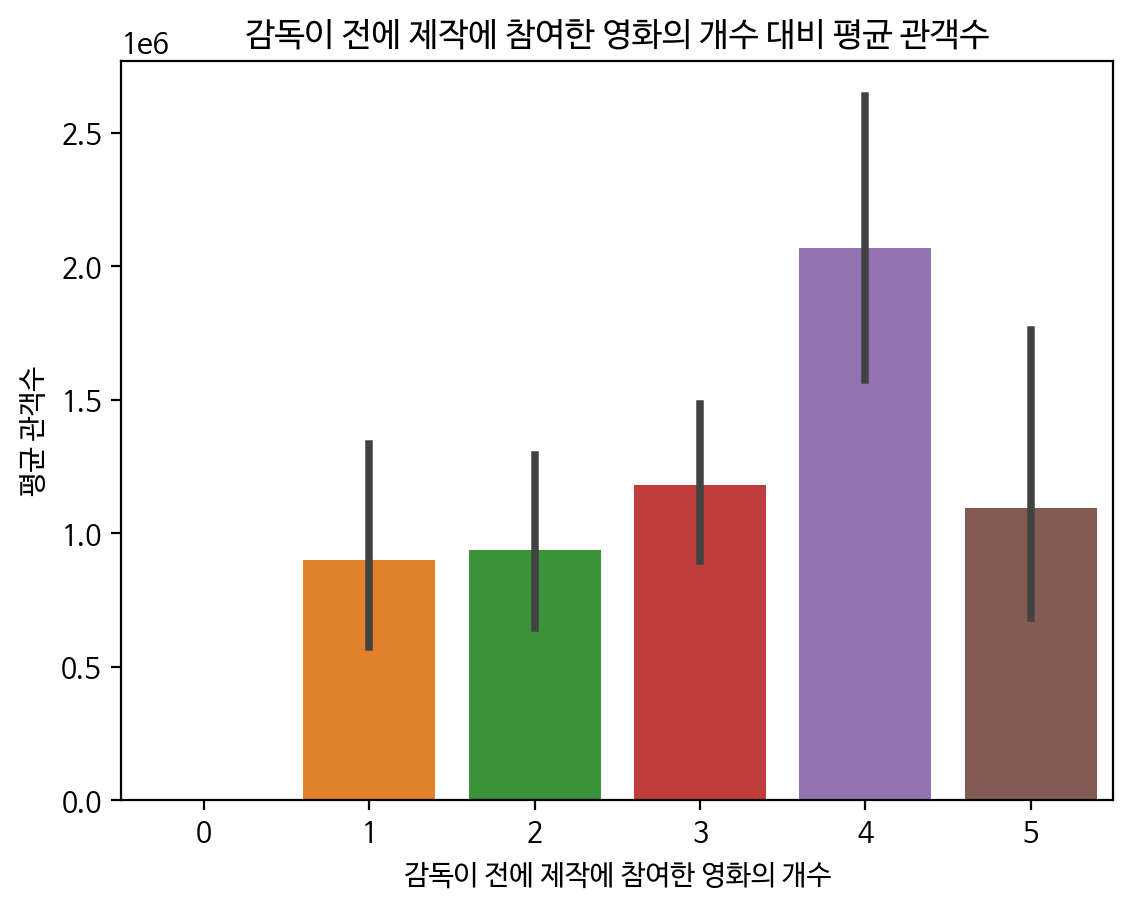

In [ ]:
ax = plt.subplots()
ax = sns.barplot(x = "dir_prev_num", y = "dir_prev_bfnum", data = train)
ax.set_title("감독이 전에 제작에 참여한 영화의 개수 대비 평균 관객수")
ax.set_xlabel("감독이 전에 제작에 참여한 영화의 개수")
ax.set_ylabel("평균 관객수")
plt.show()

**결과** 
> 
감독이 전에 제작에 참여한 영화의 개수가 늘어날수록 대체로 평균 관객수도 늘어나지만, 영화의 개수가 5개가 되었을 경우에는 관객수가 줄어든 것을 확인할 수 있다.

문제 9) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수와 관객수의 regplot

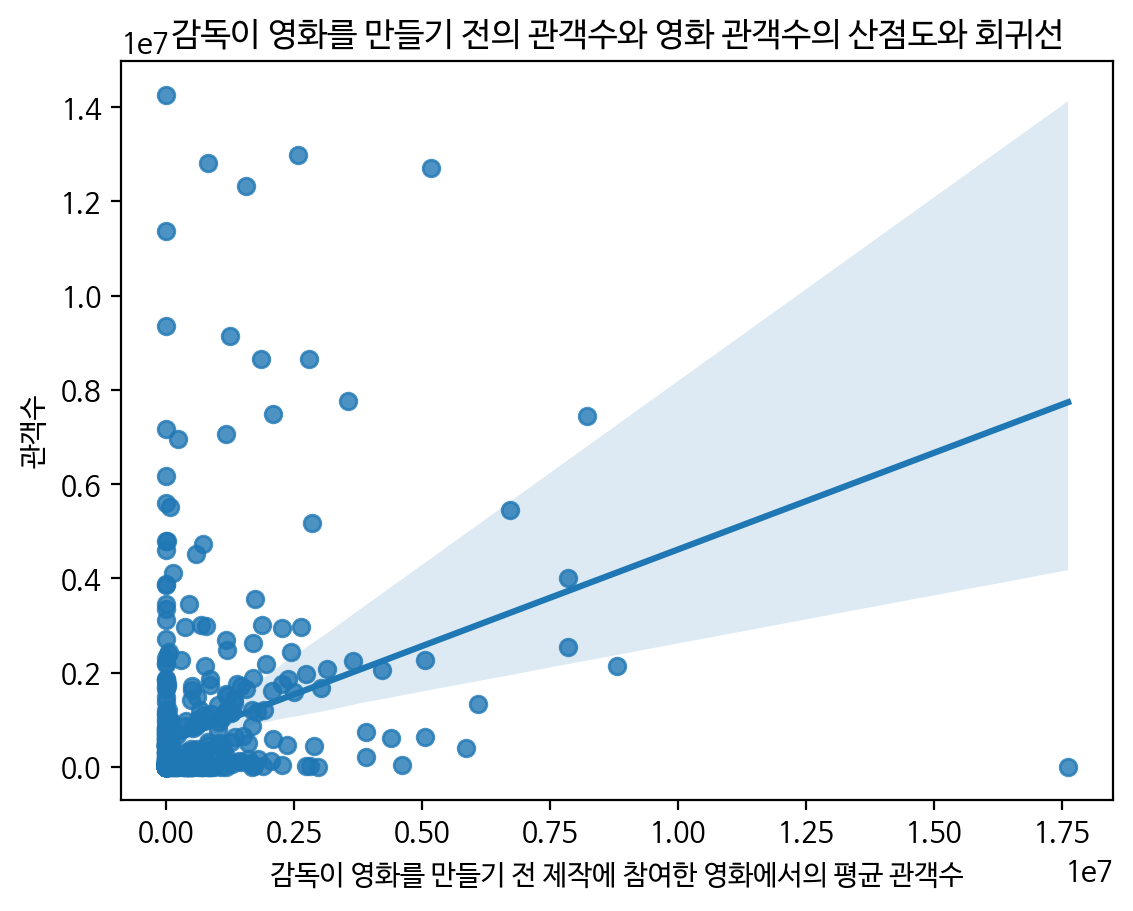

In [ ]:
ax = plt.figure()
ax = sns.regplot(x = "dir_prev_bfnum", y = "box_off_num", data = train)
ax.set_title("감독이 영화를 만들기 전의 관객수와 영화 관객수의 산점도와 회귀선")
ax.set_xlabel("감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수")
ax.set_ylabel("관객수")
plt.show()

**결과** 
> 
회귀선을 보면 감독이 영화를 만들기 전의 관객수가 늘어날수록 개봉한 영화의 관객수가 늘어나는 것을 확인할 수 있다.

문제 10) 장르 별 상영등급의 비율

In [ ]:
table  = train.groupby("genre").screening_rat.value_counts(normalize = True).unstack().reset_index()
df = pd.DataFrame(table).fillna(0)
df = df.set_index("genre")
df

screening_rat,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
genre,,,,
SF,0.230769,0.461538,0.076923,0.230769
공포,0.023810,0.452381,0.000000,0.523810
느와르,0.000000,0.333333,0.000000,0.666667
다큐멘터리,0.247312,0.182796,0.559140,0.010753
드라마,0.226244,0.343891,0.076923,0.352941
멜로/로맨스,0.128205,0.269231,0.012821,0.589744
뮤지컬,0.200000,0.000000,0.800000,0.000000
미스터리,0.000000,0.529412,0.000000,0.470588
서스펜스,0.000000,0.000000,0.000000,1.000000


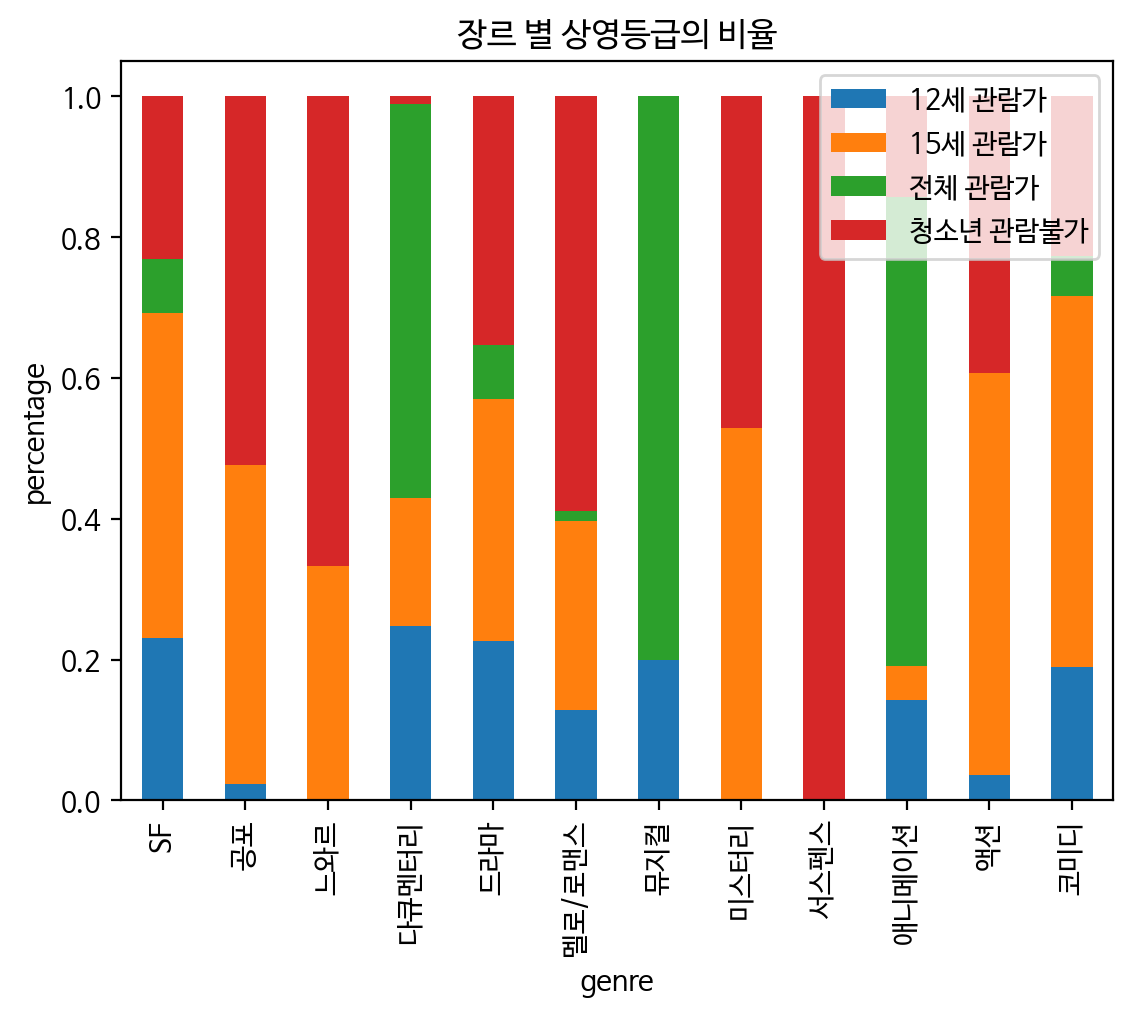

In [ ]:
df.plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right")
plt.xlabel = ("genre")
plt.ylabel("percentage")
plt.title("장르 별 상영등급의 비율")
plt.show()

**결과** 
> 
느와르, 미스터리의 경우 전체 관람가와 12세 관람가가 없고, 서스펜스의 경우에는 모든 영화가 청소년 관람불가다. 또 뮤지컬의 경우에는 모두 전체 관람가와 12세 관람가인 것을 확인할 수 있다.